In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

### Set dark photon mass and momenta

In [2]:
from dps import sample, darkphoton

In [3]:
M = 2.4 # GeV
dp = darkphoton.DarkPhoton(M)

In [4]:
sample_size = 10000

# random momenta
sample.sample(dp, "random", sample_size, seed=0, set_coord=True, quiet=True)

# constant regular momenta
# Nz, NkT = 50, 50
# sample.sample(dp, "regular", (Nz, NkT), mesh="constant", set_coord=True, quiet=True)

# constant regular momenta
# Nz, NkT = 50, 50
# sample.sample(dp, "regular", (Nz, NkT), mesh="gaussian", set_coord=True, quiet=True)

In [5]:
# access dark photon mass and momenta
print(dp.M)
print(dp.z[:5])
print(dp.kT[:5])

2.4
[0.55238238 0.71787177 0.6060448  0.548473   0.42789054]
[8.06777969 0.13694448 6.4749345  9.64478605 0.59840766]


<IPython.core.display.Javascript object>


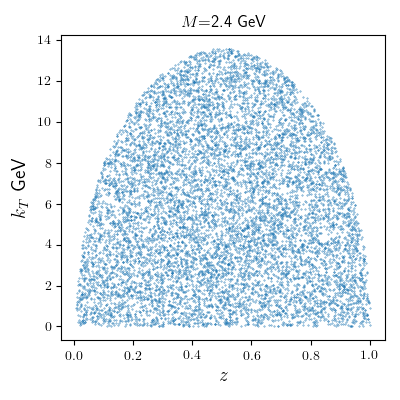

In [6]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(dp.z, dp.kT, s=0.1)
ax.set_xlabel(r"$z$", fontsize=14)
ax.set_ylabel(r"$k_T$ GeV", fontsize=14)
plt.title(r"$M$={} GeV".format(dp.M))
plt.tight_layout()

### Fitted differential cross section

In [7]:
from dps.fit import dcs

In [8]:
fit = dcs.DCS(dp.M)

/home/jonas/venv/3/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [9]:
sup = fit.sup(dp.z, dp.kT)
inf = fit.inf(dp.z, dp.kT)

In [10]:
sup[:10]

array([1.45025046e-11, 1.33128080e-04, 1.09943478e-10, 4.29371529e-13,
       9.15796151e-04, 2.97385418e-19, 4.11194711e-10, 6.26615991e-06,
       0.00000000e+00, 0.00000000e+00])

### Fitted integrated cross section

In [10]:
from dps.fit import ics

In [11]:
fit = ics.ICS()

In [12]:
M = 2.0

# central prediction
npm = fit.npm("central", M)
nlo = fit.nlo("central", M)

# PDF uncertainty interval
# npm = fit.npm("pdf", M)
# nlo = fit.nlo("pdf", M)

# scale uncertainty interval
# npm = fit.npm("scale", M)
# nlo = fit.nlo("scale", M)